## Import and prepare datasets

In [40]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

# data preparation
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# build model 1
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

# additions for model 2
from tensorflow.keras.layers import Dropout, Activation, BatchNormalization 

print(tf.__version__)

2.3.1


In [27]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [28]:
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(60000, 28, 28, 1) (60000,) (10000, 28, 28, 1) (10000,)


In [29]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

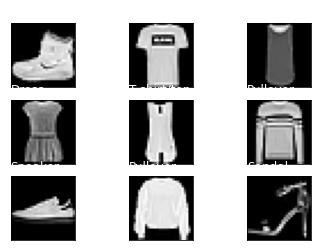

In [30]:
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(train_images[i, :, :, 0], cmap=plt.get_cmap('gray'))
    plt.title(class_names[train_labels[i]], loc='left', color="white")
    plt.xticks([]), plt.yticks([])
# show the figure
plt.show()

In [31]:
X_train = train_images/255.0
X_test = test_images/255.0
print(X_train.shape, X_test.shape)
print(X_train.min(), X_train.max())

(60000, 28, 28, 1) (10000, 28, 28, 1)
0.0 1.0


In [32]:
Y_train = to_categorical(train_labels)
Y_test = to_categorical(test_labels)
print(Y_train.shape, Y_test.shape)
print(train_labels[:3])
print(Y_train[:3,:])

(60000, 10) (10000, 10)
[9 0 0]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [33]:
def show_fit_history(h):
    fig, ax = plt.subplots(figsize=(14,4))
    plt.subplot(121)
    plt.title('Cross Entropy Loss')
    plt.plot(h.history['loss'], color='blue', label='train')
    plt.plot(h.history['val_loss'], color='orange', label='test')
    plt.legend(['train', 'test'])


    plt.subplot(122)
    plt.title('Error rate')
    plt.plot(1.0-np.array(h.history['accuracy']), color='blue', label='train')
    plt.plot(1.0-np.array(h.history['val_accuracy']), color='orange', label='test')
    plt.legend(['train', 'test'])
    plt.grid(True)
    plt.show()
    pass

## First model with 500 K parameters (~10% error rate)

In [34]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               540900    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4280 - accuracy: 0.8443 - val_loss: 0.3384 - val_accuracy: 0.8748
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2838 - accuracy: 0.8954 - val_loss: 0.2926 - val_accuracy: 0.8920
Epoch 3/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2429 - accuracy: 0.9107 - val_loss: 0.2851 - val_accuracy: 0.8958
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2137 - accuracy: 0.9208 - val_loss: 0.3116 - val_accuracy: 0.8869
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1928 - accuracy: 0.9284 - val_loss: 0.2597 - val_accuracy: 0.9076
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1758 - accuracy: 0.9349 - val_loss: 0.2614 - val_accuracy: 0.9091
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1591 - accuracy: 0.9416 - val_loss: 0.2806 - val_ac

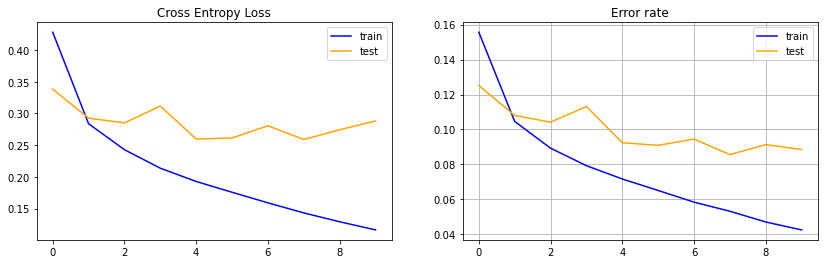

In [36]:
fit_h1 = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_test, Y_test), verbose=1)
_, acc = model.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
#model.save_weights('fashionmnist_CNN_1.h5')

show_fit_history(fit_h1)

## Second model with 1.6 M parameters (~7% error rate)

In [41]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding="same", input_shape=(28, 28, 1)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
 

model.add(Dense(10))
model.add(Activation("softmax"))

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)       

In [42]:
NUM_EPOCHS = 25
INIT_LR = 1e-2
BS = 32
opt = SGD(lr=INIT_LR, momentum=0.9, decay=INIT_LR / NUM_EPOCHS)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/25
1875/1875 [==============================] - 150s 80ms/step - loss: 0.5368 - accuracy: 0.8176 - val_loss: 0.3993 - val_accuracy: 0.8570
Epoch 2/25
1875/1875 [==============================] - 148s 79ms/step - loss: 0.3385 - accuracy: 0.8802 - val_loss: 0.2935 - val_accuracy: 0.8935
Epoch 3/25
1875/1875 [==============================] - 147s 78ms/step - loss: 0.2918 - accuracy: 0.8961 - val_loss: 0.2434 - val_accuracy: 0.9132
Epoch 4/25
1875/1875 [==============================] - 148s 79ms/step - loss: 0.2682 - accuracy: 0.9045 - val_loss: 0.2542 - val_accuracy: 0.9062
Epoch 5/25
1875/1875 [==============================] - 150s 80ms/step - loss: 0.2525 - accuracy: 0.9089 - val_loss: 0.2209 - val_accuracy: 0.9193
Epoch 6/25
1875/1875 [==============================] - 151s 81ms/step - loss: 0.2382 - accuracy: 0.9139 - val_loss: 0.2351 - val_accuracy: 0.9155
Epoch 7/25
1875/1875 [==============================] - 153s 82ms/step - loss: 0.2308 - accuracy: 0.9164 - val_loss: 0

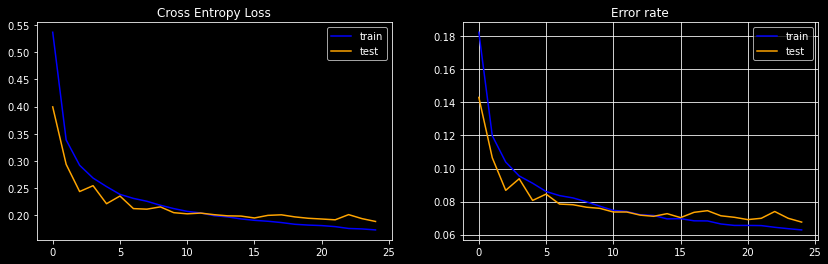

In [43]:
fit_h2 = model.fit(X_train, Y_train, epochs=NUM_EPOCHS, batch_size=BS, validation_data=(X_test, Y_test), verbose=1)
_, acc = model.evaluate(X_test, Y_test, verbose=0)
print('> %.3f' % (acc * 100.0))
#model.save_weights('mnist_CNN_2.h5')

show_fit_history(fit_h2)